# Model训练脚本

- 作用：**读取训练数据**并**训练神经网络**保存到./model.h5

可尝试修改网络结构以获得更优结果

训练好后将model.h5保存到项目根目录（已有预先模型的模型）

In [ ]:
import os
os.environ['KERAS_BACKEND']='tensorflow'

In [ ]:
import numpy as np
from keras.layers import Conv2D,Dense,Activation,Flatten,MaxPooling2D
from keras.models import Sequential
import pickle
from PIL import Image,ImageFilter
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import pickle,gzip

In [ ]:
#don't change this
resize_ratio = 8
ban=[]

# Data pre-processing

下列三个cell对应功能：

- 处理原始图片并保存到data.pkl.gz
- 读取data.pkl.gz
- 测试

一般情况下执行第二个cell即可

In [ ]:
f=gzip.open('data.pkl.gz')
X_train,y_train = pickle.load(f)
f.close()

# Build up model

In [ ]:
## build Network
model = Sequential()

# Conv layer 1 output shape (32, 28, 28)
model.add(Conv2D(
                        batch_input_shape=(None, 100,135, 1),
                        filters=32,
                        kernel_size=5,
                        strides=1,
                        padding='same',
                        ))
model.add(Activation('relu'))
model.add(MaxPooling2D(
                       pool_size=2,
                       padding='same',
                       ))

model.add(Conv2D(
                        filters=48,
                        kernel_size=5,
                        strides=1,
                        padding='same',
                        ))
model.add(Activation('relu'))
model.add(MaxPooling2D(
                       pool_size=2,
                       padding='same',
                       ))

model.add(Conv2D(
                        filters=64,
                        kernel_size=5,
                        strides=1,
                        padding='same',
                        ))
model.add(Activation('relu'))
model.add(MaxPooling2D(
                       pool_size=2,
                       padding='same',
                       ))



model.add(Flatten())

# model.add(Dense(512))
# model.add(Activation('relu'))

model.add(Dense(96))
model.add(Activation('relu'))

#model.add(Dense(16))
#model.add(Activation('relu'))

#model.add(Dense(8))
#model.add(Activation('relu'))

model.add(Dense(4))
model.add(Activation('sigmoid'))

# We add metrics to get more results you want to see
model.compile(optimizer='adam',
              loss='mse'
              )

# Train

In [ ]:
print('Training ------------')
model.fit(X_train[:-10], y_train[:-10], epochs=1, batch_size=16)

# Test

In [ ]:
index=0
maxloss=-1
for i in range(len(X_train)):
    if i in ban:
        continue
    loss = model.test_on_batch(np.array([X_train[i]]), np.array([y_train[i]]))
    if loss > maxloss:
        maxloss=loss
        index=i
ban.append(index)

932


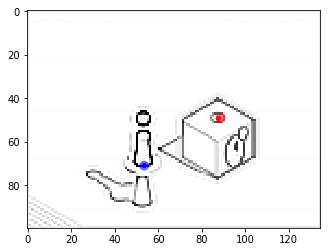

In [12]:
print index
pre=model.predict(X_train[index].reshape(1,100,135,1))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.add_patch(Circle(xy = (y_train[index][0]*1080/resize_ratio,y_train[index][1]*800/resize_ratio), radius=1, alpha=0.9, color='red'))
ax.add_patch(Circle(xy = (y_train[index][2]*1080/resize_ratio,y_train[index][3]*800/resize_ratio), radius=1, alpha=0.9, color='blue'))
ax.add_patch(Circle(xy = (pre[0][0]*1080/resize_ratio,pre[0][1]*800/resize_ratio), radius=2, alpha=0.5, color='red'))
ax.add_patch(Circle(xy = (pre[0][2]*1080/resize_ratio,pre[0][3]*800/resize_ratio), radius=2, alpha=0.5, color='blue'))
ax.imshow(X_train[index].reshape(100,135),cmap='gray')
plt.show()

In [ ]:
model.save('model.h5')

In [ ]:
loss = model.evaluate(X_train[-10:], y_train[-10:])
print('test loss: ', loss)